## 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import( accuracy_score,
                           confusion_matrix,
                           classification_report,
                          roc_auc_score,
                          roc_curve,
                          auc,
                          plot_confusion_matrix,
                          plot_roc_curve)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from tensorflow.keras.metrics import AUC
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

pd.set_option ('display.float','{:0.2f}'.format)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

In [2]:
data=pd.read_csv('lending_club_loan_two.csv')

In [3]:
# mapping target column
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [4]:
data.verification_status=data.verification_status.replace('Source Verified','Source_Verified')

In [5]:
# Dropping title column
data.drop('emp_title',axis=1,inplace=True)

In [6]:
# Dropping emp_length column
data.drop('emp_length',axis=1,inplace= True)

In [7]:
# Dropping the title column
data.drop('title',axis=1,inplace= True)

In [8]:
# dropping the remaining null values
data.dropna(inplace= True)

In [9]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

**Successfully removed all the null Values**

### Categorical Variables and Dummy Variables

In [10]:
# mapping term column values
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [11]:
# sub_garde is sub category of grade hence dropping grade column
data.drop('grade',axis=1,inplace=True)

In [12]:
# dummy encoding
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data=pd.get_dummies(data, columns=dummies, drop_first= True)

In [13]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source_Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000,36,11.44,329.48,117000.00,01-01-2015,0,26.24,01-06-1990,16,0,36369,41.80,25,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,8000,36,11.99,265.68,65000.00,01-01-2015,0,22.05,01-07-2004,17,0,20131,53.30,27,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600,36,10.49,506.97,43057.00,01-01-2015,0,12.79,01-08-2007,13,0,11987,92.20,26,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,7200,36,6.49,220.65,54000.00,01-11-2014,0,2.60,01-09-2006,6,0,5472,21.50,13,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375,60,17.27,609.33,55000.00,01-04-2013,1,33.95,01-03-1999,13,0,24584,69.80,43,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [14]:
# extracting zip code from address
data['zipcode']=data.address.apply(lambda x: x[-5:] )

In [15]:
# dummy encoding zip code
data=pd.get_dummies(data, columns=['zipcode'], drop_first=True)

In [16]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source_Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,10000,36,11.44,329.48,117000.00,01-01-2015,0,26.24,01-06-1990,16,0,36369,41.80,25,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000,36,11.99,265.68,65000.00,01-01-2015,0,22.05,01-07-2004,17,0,20131,53.30,27,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.00,01-01-2015,0,12.79,01-08-2007,13,0,11987,92.20,26,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,54000.00,01-11-2014,0,2.60,01-09-2006,6,0,5472,21.50,13,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,55000.00,01-04-2013,1,33.95,01-03-1999,13,0,24584,69.80,43,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
# dropping address column
data.drop('address', axis=1,inplace= True)

In [18]:
# dropping issue_d column
data.drop('issue_d',axis=1,inplace =True)

In [19]:
# dropping earliest_cr_line column
data.drop('earliest_cr_line',axis=1,inplace =True)

In [20]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source_Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,10000,36,11.44,329.48,117000.00,0,26.24,16,0,36369,41.80,25,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000,36,11.99,265.68,65000.00,0,22.05,17,0,20131,53.30,27,3.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.00,0,12.79,13,0,11987,92.20,26,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,54000.00,0,2.60,6,0,5472,21.50,13,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,55000.00,1,33.95,13,0,24584,69.80,43,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Base Model

In [21]:
import statsmodels
import statsmodels.api as sm

In [22]:
X=data.drop('loan_status',axis=1)
X = sm.add_constant(X)
y=data.loan_status

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15, test_size = 0.3)

In [24]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

         Current function value: 0.258025
         Iterations: 35


C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               250609
Model:                          Logit   Df Residuals:                   250529
Method:                           MLE   Df Model:                           79
Date:                Sun, 30 Jul 2023   Pseudo R-squ.:                  0.4847
Time:                        18:04:30   Log-Likelihood:                -64663.
converged:                      False   LL-Null:                   -1.2548e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.066e+04   1.22e+06     -0.009      0.993    -2.4e+06    2.38e+06
loan_amnt                            -2.01e-05   6.37e-0

## AIC

In [25]:
logreg.aic

129486.79146456537

In [26]:
# we compare the aic with other model, model with low aic is good model.

## Kappa statistic

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred]

In [29]:
from sklearn.metrics import cohen_kappa_score

In [30]:
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.5650961132839756


In [31]:
# Kappa statistic is a measure of inter-rater reliability or degree of agreement
# 0 no agreement
# 1 perfect agreement

## ROC - AUC score

In [32]:
from sklearn import metrics

In [33]:
metrics.roc_auc_score(y_test, y_pred)

0.7298699652048475

In [34]:
# The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at
# distinguishing between the positive and negative classes.

In [35]:
# we can plot roc curve also

## Youden's Index

In [36]:
# select the cut-off probability for which the (TPR - FPR) is maximum.
# i.e. TPR maximum amd FPR minimum

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [38]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head(10)

,TPR,FPR,Threshold,Difference
0,0.47,0.01,1,0.46
1,0.00,0.00,2,0.00
2,1.00,1.00,0,0.00


In [39]:
# Youdens index with tell about cutoff (threshold) for which difference is maximum

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [40]:
X=data.drop('loan_status',axis=1)
y=data.loan_status

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(239869, 79)
(118145, 79)
(239869,)
(118145,)


In [42]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'verification_status_Source_Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house'

### Scaling the Data

In [43]:
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Model Building

In [44]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")


# 1. XGBoost Classifier

In [45]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.42%
_______________________________________________
CLASSIFICATION REPORT:
                  0        1  accuracy  macro avg  weighted avg
precision      0.89     0.94      0.89       0.91          0.90
recall         0.99     0.51      0.89       0.75          0.89
f1-score       0.94     0.66      0.89       0.80          0.88
support   191577.00 48292.00      0.89  239869.00     239869.00
_______________________________________________
Confusion Matrix: 
 [[189947   1630]
 [ 23748  24544]]

Test Result:
Accuracy Score: 79.97%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision     0.93     0.50      0.80       0.72          0.84
recall        0.81     0.75      0.80       0.78          0.80
f1-score      0.87     0.60      0.80       0.73          0.81
support   94359.00 23786.00      0.80  118145.00     118145.00
______________________________________________

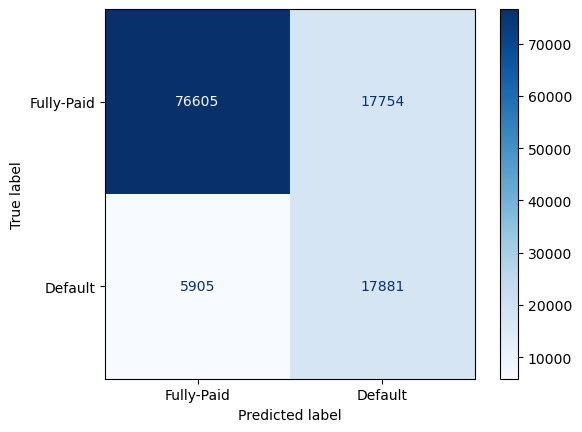

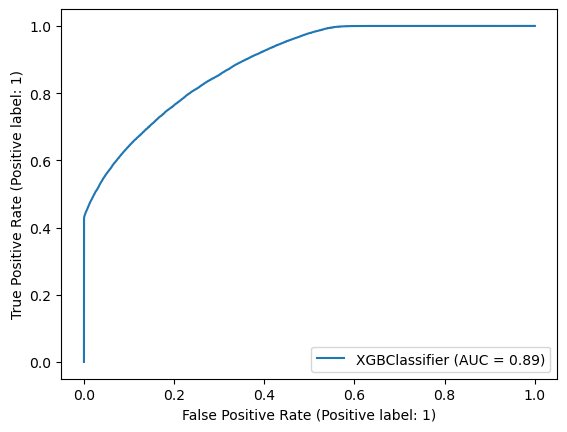

In [46]:
disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)

# 2.  Random Forest Classifier


In [47]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0        1  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   191577.00 48292.00      1.00  239869.00     239869.00
_______________________________________________
Confusion Matrix: 
 [[191577      0]
 [     1  48291]]

Test Result:
Accuracy Score: 87.31%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision     0.89     0.76      0.87       0.83          0.87
recall        0.96     0.54      0.87       0.75          0.87
f1-score      0.92     0.63      0.87       0.78          0.86
support   94359.00 23786.00      0.87  118145.00     118145.00
_____________________________________________

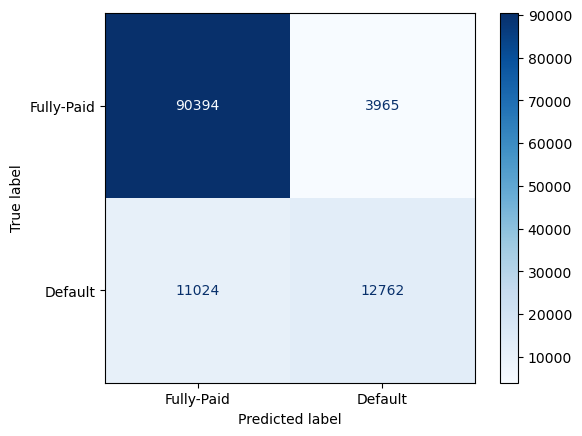

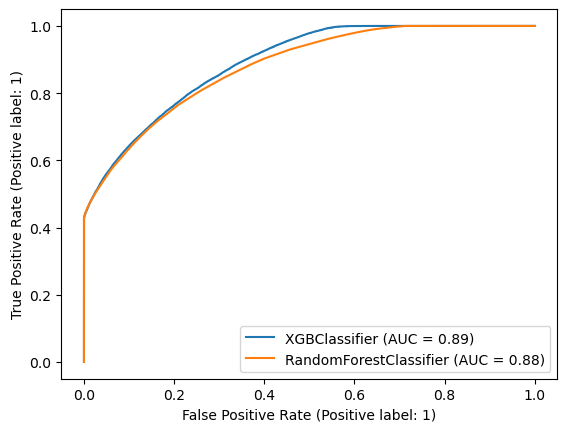

In [48]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)


#  Comparing Models Performance 

In [49]:
ml_models = {
    'XGBoost': xgb_clf,
    'Random Forest': rf_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")


XGBOOST                        roc_auc_score: 0.782
RANDOM FOREST                  roc_auc_score: 0.747


# Applying smote to improve performance

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_res == 0)))

After OverSampling, counts of label '1': 285936
After OverSampling, counts of label '0': 285936 



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 10)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (400310, 79)
Number transactions y_train dataset:  (400310,)
Number transactions X_test dataset:  (171562, 79)
Number transactions y_test dataset:  (171562,)


In [52]:
# xgboost for balanced data
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 92.86%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision      0.88      0.98      0.93       0.93          0.93
recall         0.99      0.87      0.93       0.93          0.93
f1-score       0.93      0.92      0.93       0.93          0.93
support   200468.00 199842.00      0.93  400310.00     400310.00
_______________________________________________
Confusion Matrix: 
 [[197683   2785]
 [ 25786 174056]]

Test Result:
Accuracy Score: 92.42%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision     0.88     0.98      0.92       0.93          0.93
recall        0.98     0.87      0.92       0.92          0.92
f1-score      0.93     0.92      0.92       0.92          0.92
support   85468.00 86094.00      0.92  171562.00     171562.00
_________________________________________

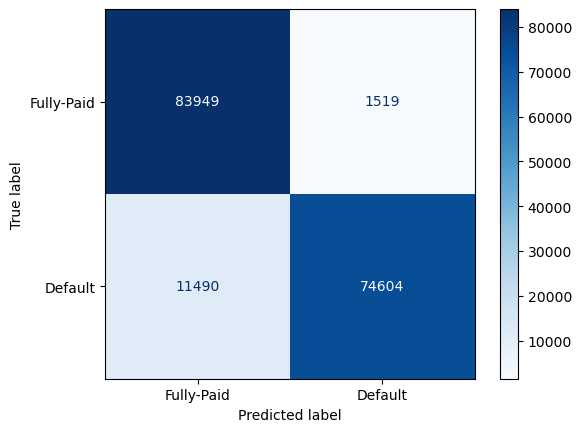

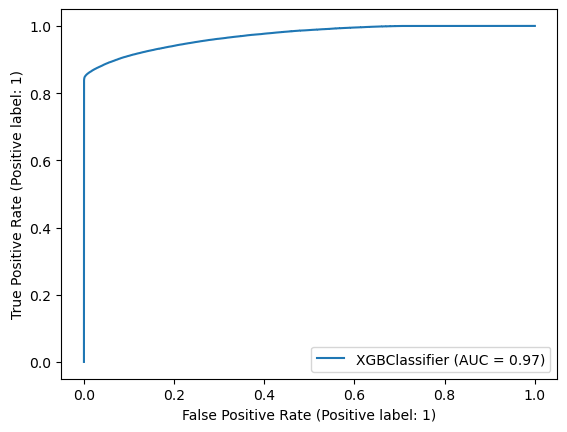

In [53]:
disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)

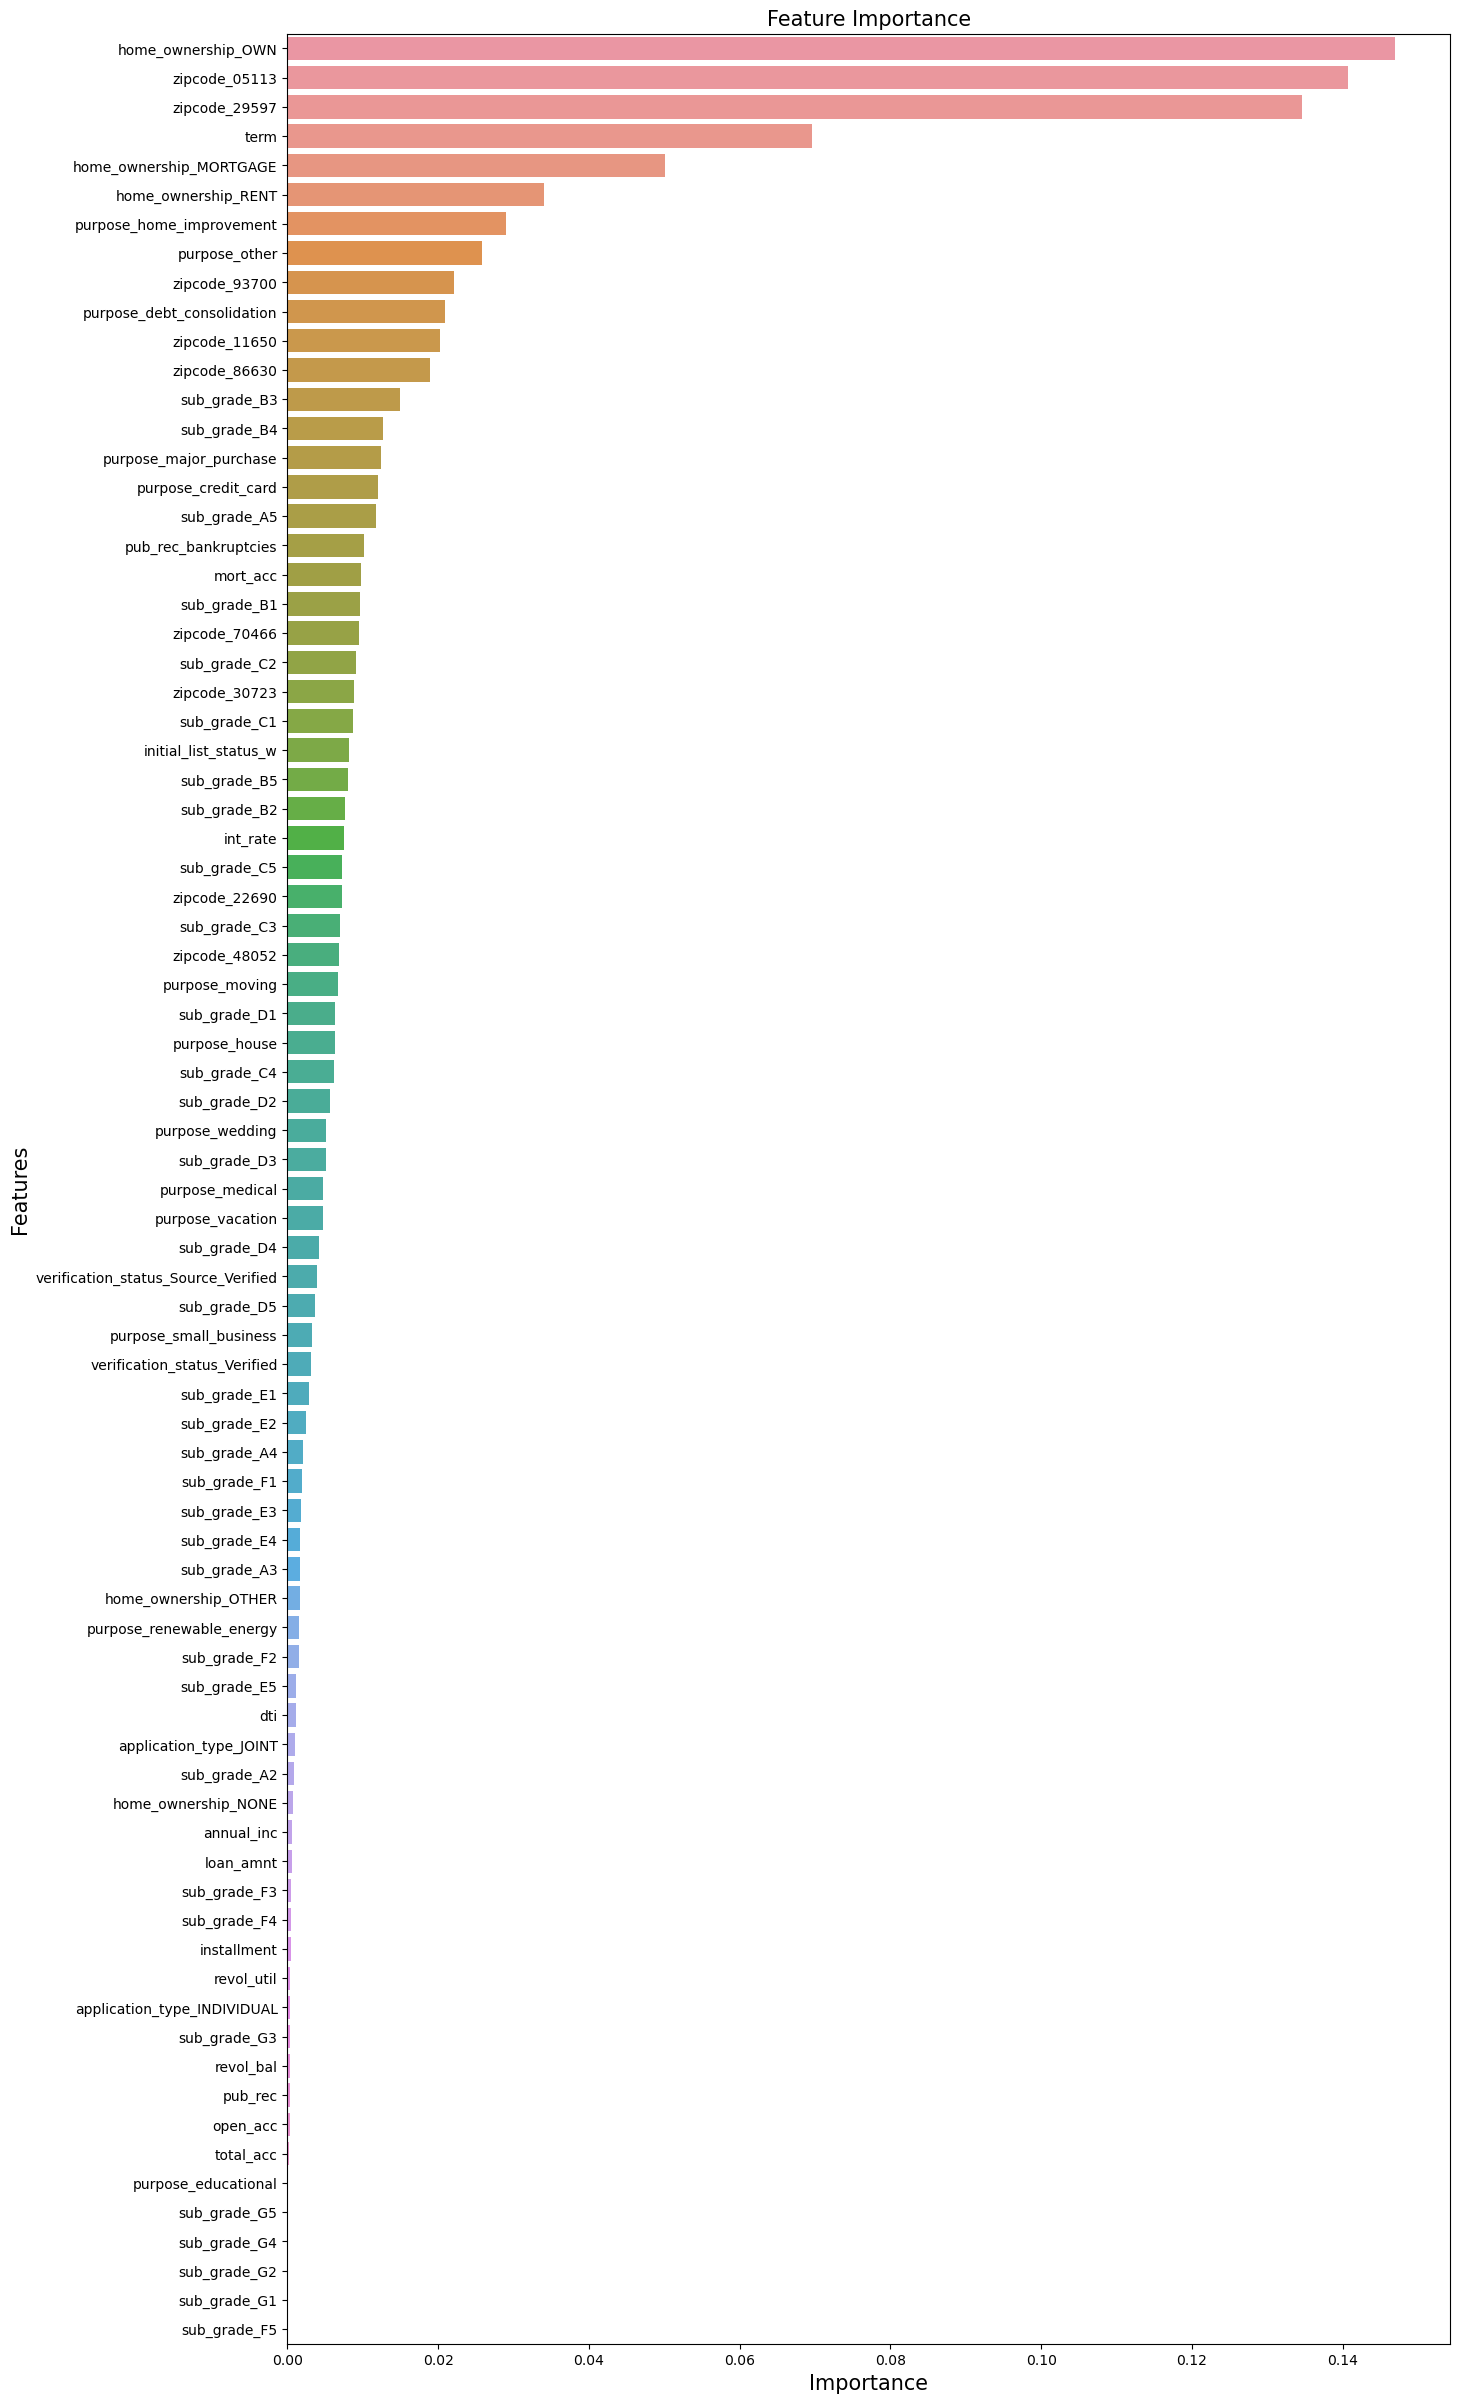

In [71]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X.columns, 
                                   'Importance': xgb_clf.feature_importances_})


# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

fig, ax = plt.subplots(figsize=(15, 30))

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features,ax=ax)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [72]:
import shap

# Fits the explainer
explainer = shap.Explainer(xgb_clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 171563it [4:16:33, 11.14it/s]                                                                   


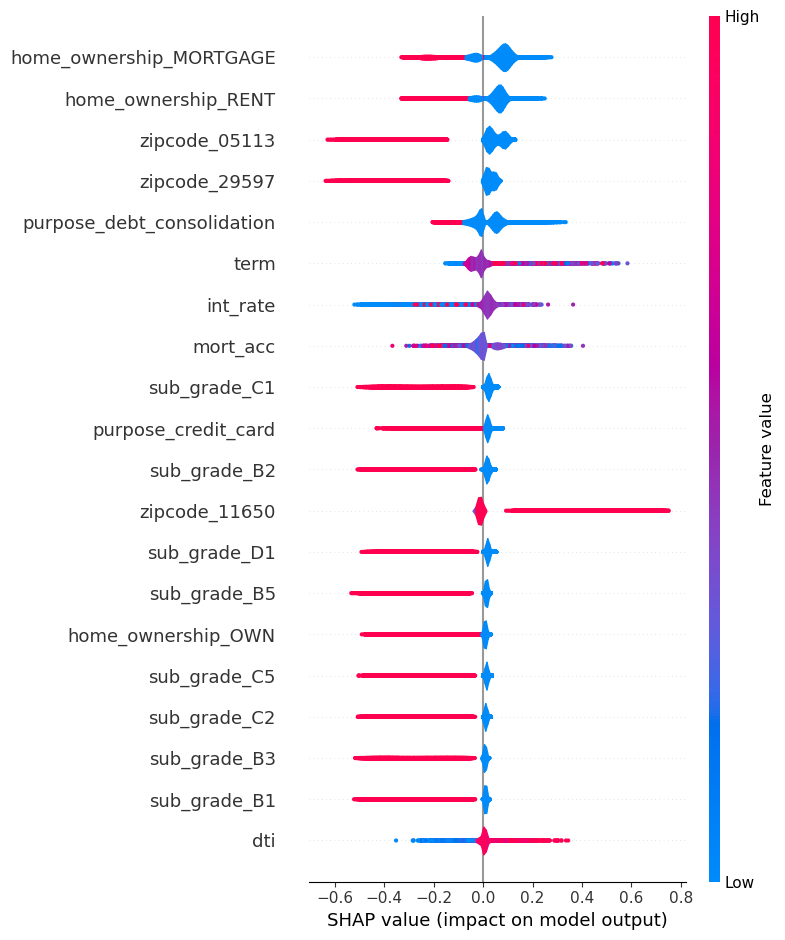

In [74]:
shap.summary_plot(shap_values,plot_type='violin')

# statistics

### test to check sample is representative of population

In [54]:
# H0 - sample is representative of population
# H1 - sample is not representative of population

In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(X,X_train)

Ttest_indResult(statistic=array([-1.77149609e+01, -5.27658620e+01, -8.09117061e+01, -1.18717928e+01,
        1.97815102e+01, -1.88242164e+01,  6.64797192e+00,  3.49968256e+01,
        4.99558425e+00, -2.62744439e+01,  1.48346035e+01,  2.48641441e+01,
       -2.12139794e+00,  2.70434076e+01,  2.85022792e+01,  3.45846600e+01,
        3.85384396e+01,  3.99879422e+01,  4.36731165e+01,  4.67587272e+01,
        4.58020244e+01,  4.19406905e+01,  4.32473041e+01,  4.11985066e+01,
        3.95211335e+01,  3.97629298e+01,  3.64689738e+01,  3.47665864e+01,
        3.24842649e+01,  2.91310482e+01,  2.92040474e+01,  2.65446092e+01,
        2.41767766e+01,  2.35646386e+01,  2.02006808e+01,  1.94790552e+01,
        1.87518185e+01,  1.66185300e+01,  1.38827774e+01,  1.37125095e+01,
        1.18074989e+01,  1.08616114e+01,  9.64510740e+00,  7.88014791e+00,
        7.25753221e+00,  5.88492813e+00,  4.82465474e+00,  6.90579523e+01,
        6.18402984e+01,  7.39800391e+01,  6.41862233e+01,  7.90016345e-02,

In [57]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'verification_status_Source_Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house'

If the p-value is greater than your chosen significance level (e.g., 0.05), you can fail to reject the null hypothesis and conclude that the training sample is representative of the population.

In [58]:
#term and interest rate is not representative of population

# test for feature selection

### anova

In [59]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif


# Perform feature selection using ANOVA
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Print the indices and names of selected features
selected_features = X.columns[selected_indices]
print("Selected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
term
int_rate
dti
revol_util
mort_acc
sub_grade_A4
sub_grade_A5
sub_grade_E3
home_ownership_MORTGAGE
home_ownership_RENT
zipcode_05113
zipcode_11650
zipcode_29597
zipcode_86630
zipcode_93700
